# Trabalho Prático 3 - CCF 726
**Aluno**: Fábio Trindade Ramos - **Matrícula**: 3869
## Objetivo
O objetivo deste trabalho é aplicar os conhecimentos obtidos com tratamento de dados, engenharia 
de atributos, criação e ajustes de modelos de aprendizado de máquinas para resolver um problema 
real.

## Configuração inicial

In [141]:
import pathlib
import sys
import os
import warnings
requirements_filename = 'requirements_tp3.txt'
if str(pathlib.Path().resolve().name) == "notebooks":
    root = str(pathlib.Path().resolve().parent.parent)+os.sep
    sys.path.append(root)
    requirements_path = root + 'requirements/'+requirements_filename
else:
    ! git clone --branch ap8 https://github.com/Fabio-Trindade/Eng-Aprendizado-Maquina.git
    root = str(pathlib.Path().resolve())
    src_path = root + '/Eng-Aprendizado-Maquina/'
    requirements_path = src_path + 'requirements/'+requirements_filename
    sys.path.append(root + '/Eng-Aprendizado-Maquina/')
warnings.filterwarnings("ignore")

## Definindo raíz do projeto e caminho do dataset

In [142]:
from src.constants.KPaths import KPaths

root = KPaths.path_root
path_to_dataset = root + '/datasets/salarios-ciencia-dados.csv'

## Análise exploratória

### Leitura do dataset

In [143]:
import pandas as pd
df = pd.read_csv(path_to_dataset)
df

,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,salario,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


### Visão geral do dataset

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   #ano_trabalho         3755 non-null   int64 
 1   nivel_experiencia     3755 non-null   object
 2   tipo_emprego          3755 non-null   object
 3   titulo_trabalho       3755 non-null   object
 4   salario               3755 non-null   int64 
 5   moeda_salario         3755 non-null   object
 6   salario_em_dolar      3755 non-null   int64 
 7   residencia_empregado  3755 non-null   object
 8   percentual_remoto     3755 non-null   int64 
 9   local_empresa         3755 non-null   object
 10  tamanho_empresa       3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


O *dataset* contém 3.755 observações com 11 atributos cada. Quatro destes atributos são números inteiros e 7 são strings. Além disso, nenhuma coluna contém dados nulos.

### Pré-processamento
A coluna salário é um atributo que não estará sempre presente em uma observação, portanto será retirada do dataset.

In [145]:
df = df.drop('salario',axis=1)

#### Verificando dados duplicados 

In [146]:
df.duplicated().sum()

1171

#### Removendo dados duplicados

In [147]:
df = df.drop_duplicates()

In [148]:
df

,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,USD,100000,US,100,US,L


### Descrição estatística dos dados numéricos

In [149]:
numeric_columns = ['#ano_trabalho','salario_em_dolar','percentual_remoto']
df[numeric_columns].describe()

,#ano_trabalho,salario_em_dolar,percentual_remoto
count,2584.000000,2584.000000,2584.000000
mean,2022.301084,133409.280186,50.483746
std,0.749179,67136.837329,48.163707
min,2020.000000,5132.000000,0.000000
25%,2022.000000,84975.000000,0.000000
50%,2022.000000,130000.000000,50.000000
75%,2023.000000,175000.000000,100.000000
max,2023.000000,450000.000000,100.000000


Através das estatísticas acima percebe-se que:
* Os dados foram coletados durante 4 anos (2020-2023). Este atributo pode se tornar atributo categórico.
* As colunas salario_em_dolar e percentual_remoto contém um elevado desvio padrão.
* Os valores numéricos possuem diferentes escalas.
* Com exceção da coluna #ano_trabalho, em todas as colunas podem ser aplicadas técnicas de normalização.

### Histograma dos dados numéricos

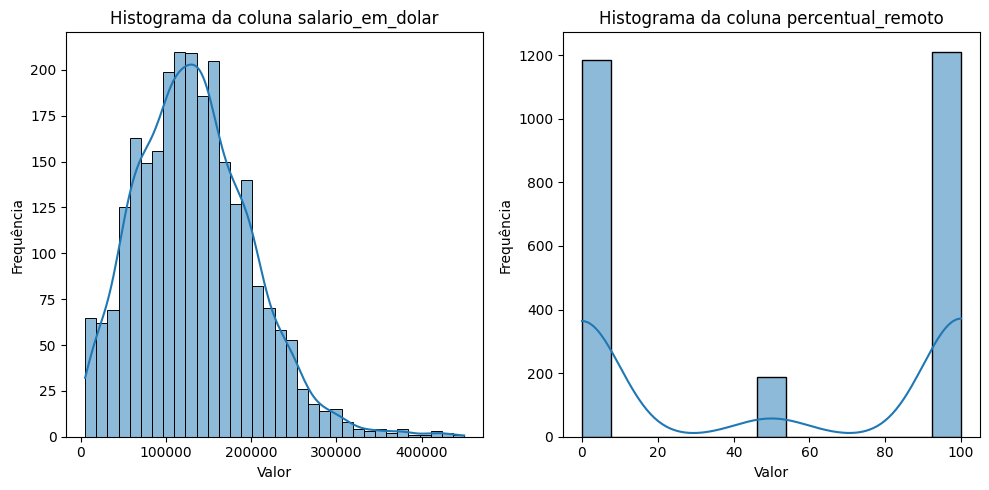

In [150]:
import seaborn as sns
from matplotlib import pyplot as plt

num_rows = 1
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))
axes = axes.flatten()

for i, col in enumerate( ['salario_em_dolar','percentual_remoto']):
    if col != '#ano_trabalho':
        sns.histplot(data=df, x=df[col], kde=True, multiple='stack', ax=axes[i])

        axes[i].set_title(f'Histograma da coluna {col}')
        axes[i].set_xlabel('Valor')
        axes[i].set_ylabel('Frequência')

plt.tight_layout()

plt.show()

A partir do histograma acima, percebe-se que a coluna percentual_remoto possivelmente contém 3 valores: 0, 50 e 100. Dessa forma, este atributo pode ser considerado como um atributo categórico. Já o histograma do atributo salario_em_dolar apresenta uma calda longa a direita, apresentando outliers.

### Análise par a par dos atributos numéricos

#### Correlação

<Axes: >

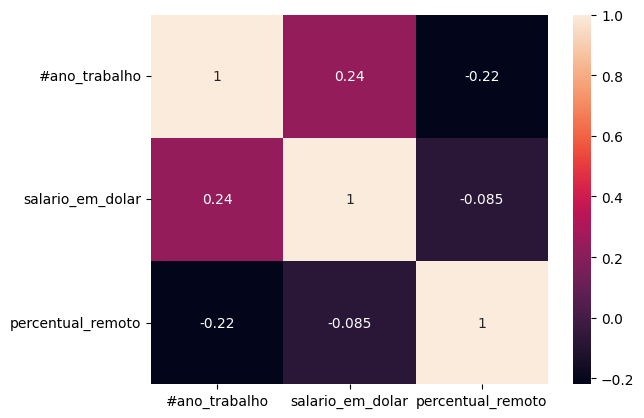

In [151]:
import seaborn as sns
sns.heatmap(data=df[numeric_columns].corr(), annot=True)

As colunas #ano_trabalho e percentual_remoto, e salario_em_dolar e #ano_remoto apresentam uma correlação fraca.

#### Gráficos de dispersão

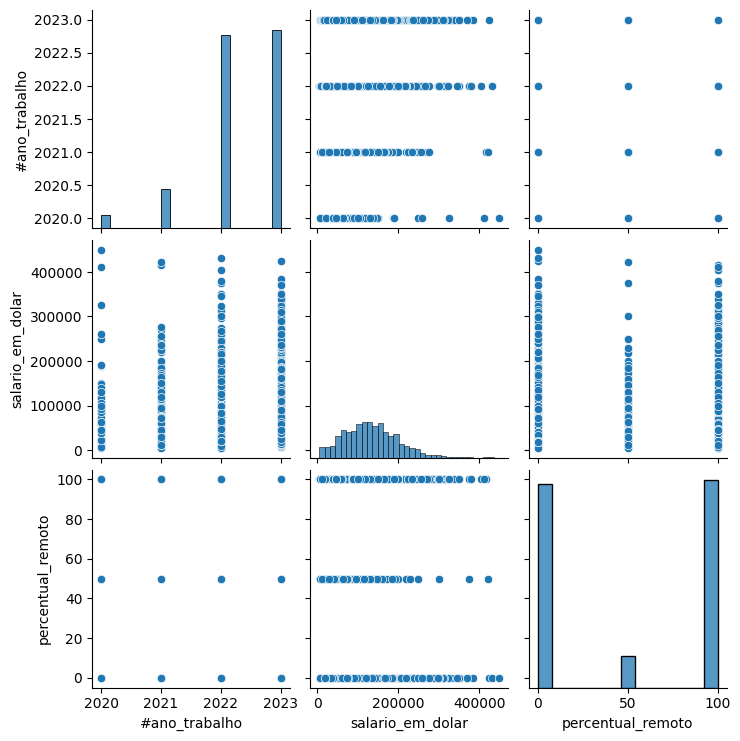

In [152]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.pairplot(df[numeric_columns])
plt.show()

Observações sobre os gráficos de dispersão:
* O gráfico salario_em_dolar x #ano_trabalho mostra que possivelmente quanto maior o ano, maior é a chance da pessoa ganhar um salário melhor.
* O gráfico percentual_remoto x salario_em_dolar mostra que pessoas que ganham 50% de percentual remoto tendem a não possuir elevados salários.

### Análise das colunas categóricas em relação a coluna salario_em_dolar

#### Função para gerar gráfico de histogramas agrupados por categoria junto com boxplots

In [153]:
def gen_graphics(categoric_column):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes = axes.flatten()
    sns.histplot(data=df, x=df['salario_em_dolar'], kde=True,hue=categoric_column, multiple='stack',ax=axes[0])
    df.boxplot('salario_em_dolar',by = categoric_column,ax=axes[1])
    plt.tight_layout()
    plt.show()


#### nivel_experiencia x salario_em_dolar

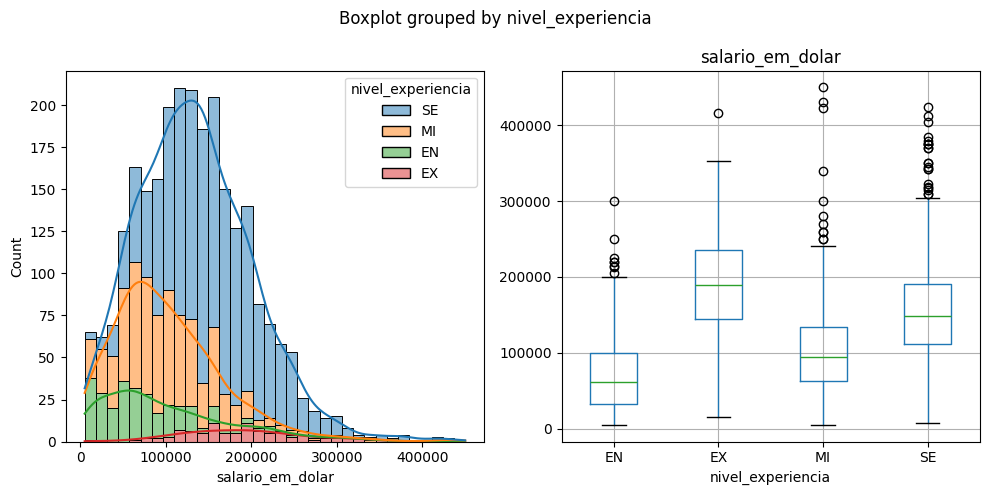

In [154]:
gen_graphics('nivel_experiencia')

Os gráficos acima mostram que quanto maior o cargo, mais comum é a existência de pessoas com maiores salários. 

#### tipo_emprego x salario_em_dolar

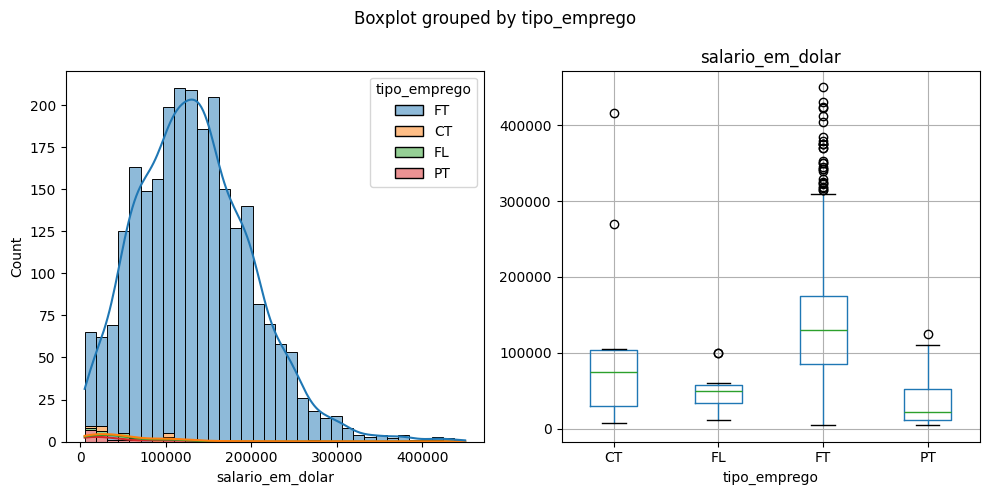

In [155]:
gen_graphics('tipo_emprego')

A maioria das pessoas trabalham em tempo integral e a maioria dos maiores salários são destas pessoas.

#### titulo_trabalho, moeda_salario,local_empresa,residencia_empregado x salario_em_dolar

##### Função para gerar o gráfico de barras por categoria e ordenar em ordem decrescente

In [156]:
def plot_large_classes_by_mean(column):
    mean_salary = df.groupby(column)['salario_em_dolar'].mean().reset_index()
    mean_salary = mean_salary.sort_values('salario_em_dolar', ascending=False)

    plt.figure(figsize=(14,21))
    sns.barplot(data=mean_salary, x='salario_em_dolar', y=column)
    plt.ylabel(None)
    plt.show()

##### titulo_trabalho x salario_em_dolar

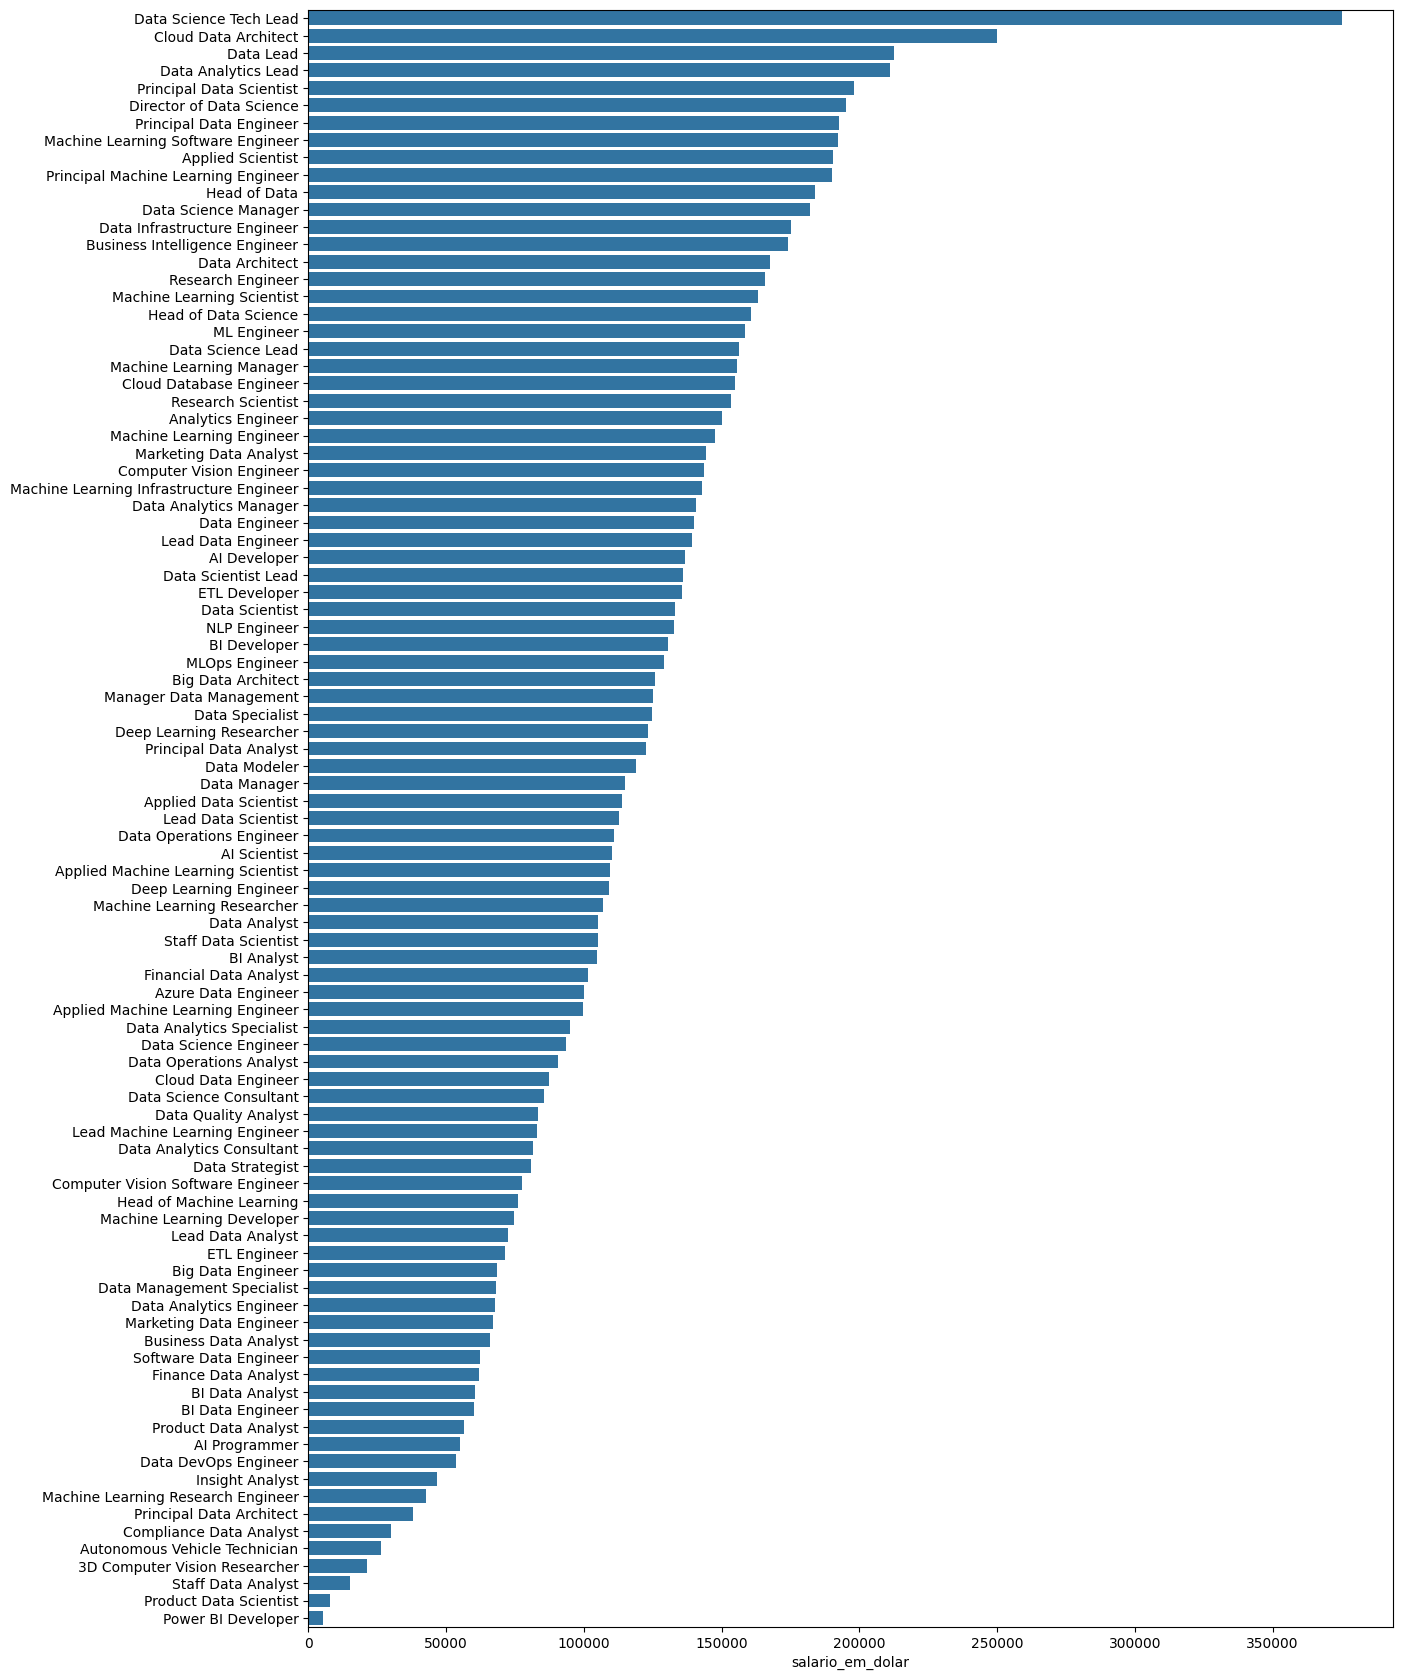

In [157]:
plot_large_classes_by_mean('titulo_trabalho')

##### moeda_salario x salario_em_dolar

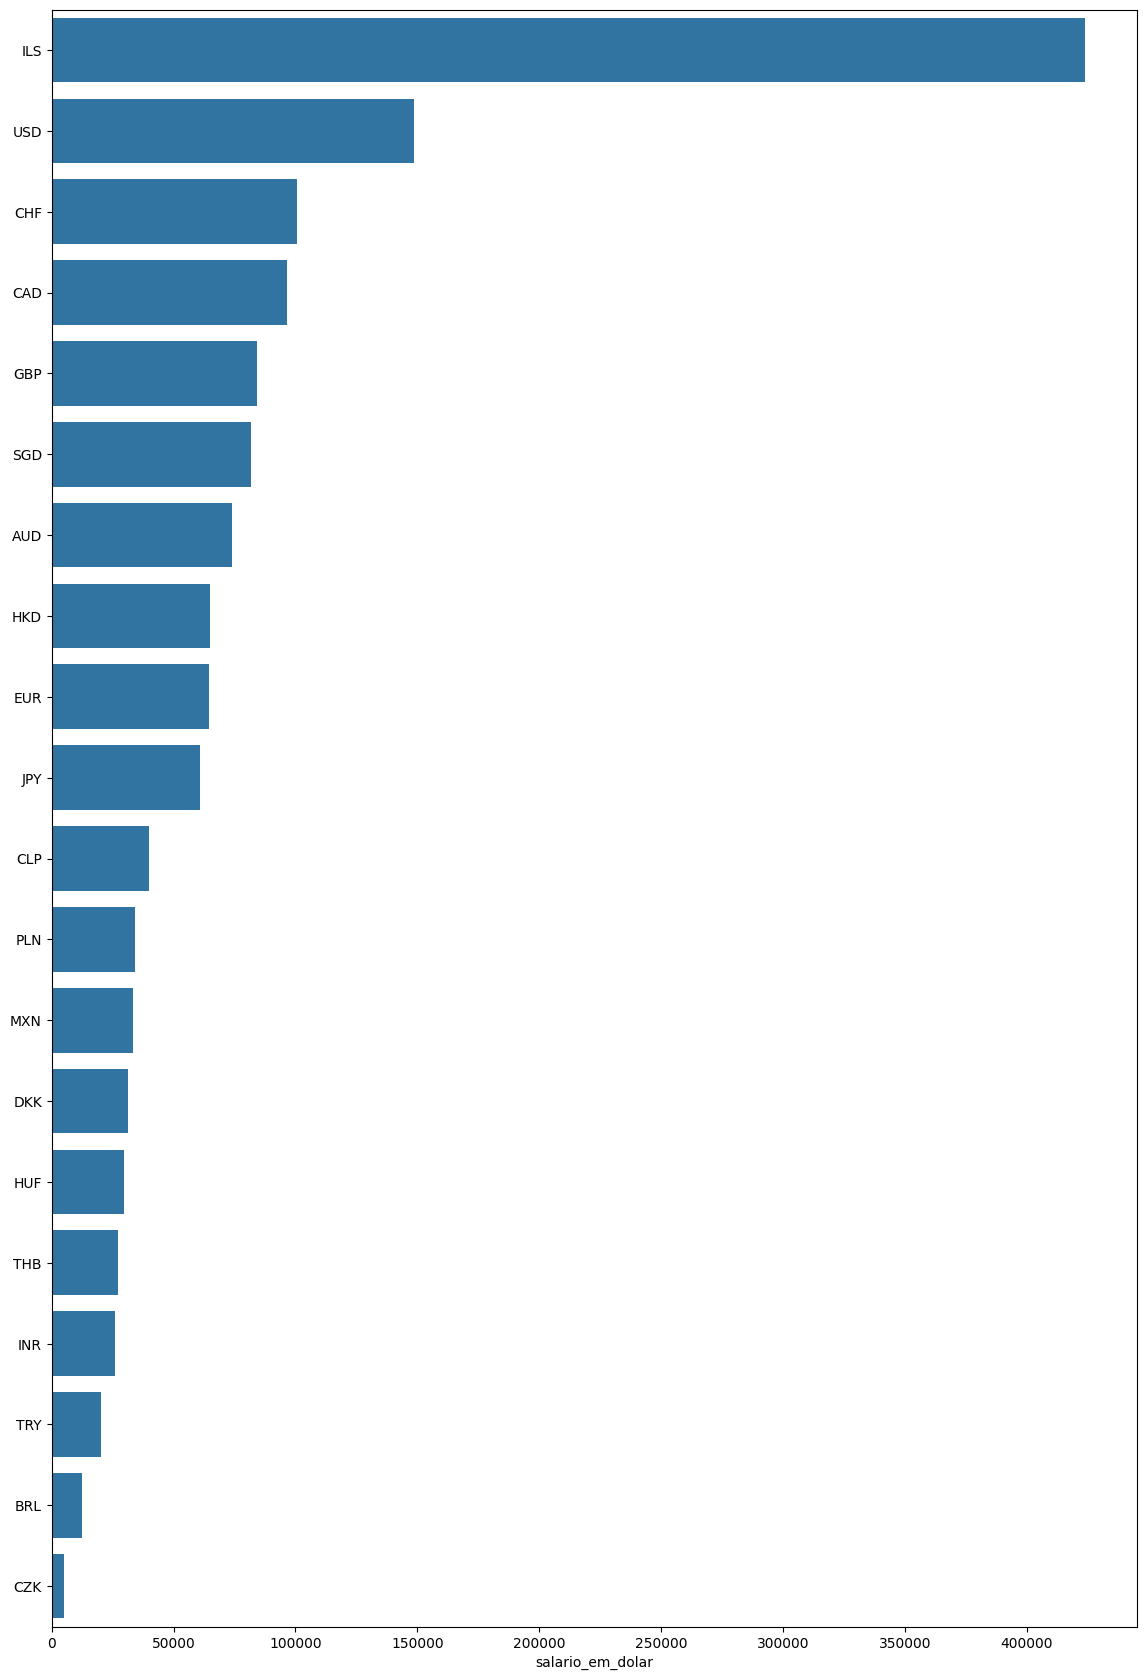

In [158]:
plot_large_classes_by_mean('moeda_salario')

##### local_empresa x salario_em_dolar

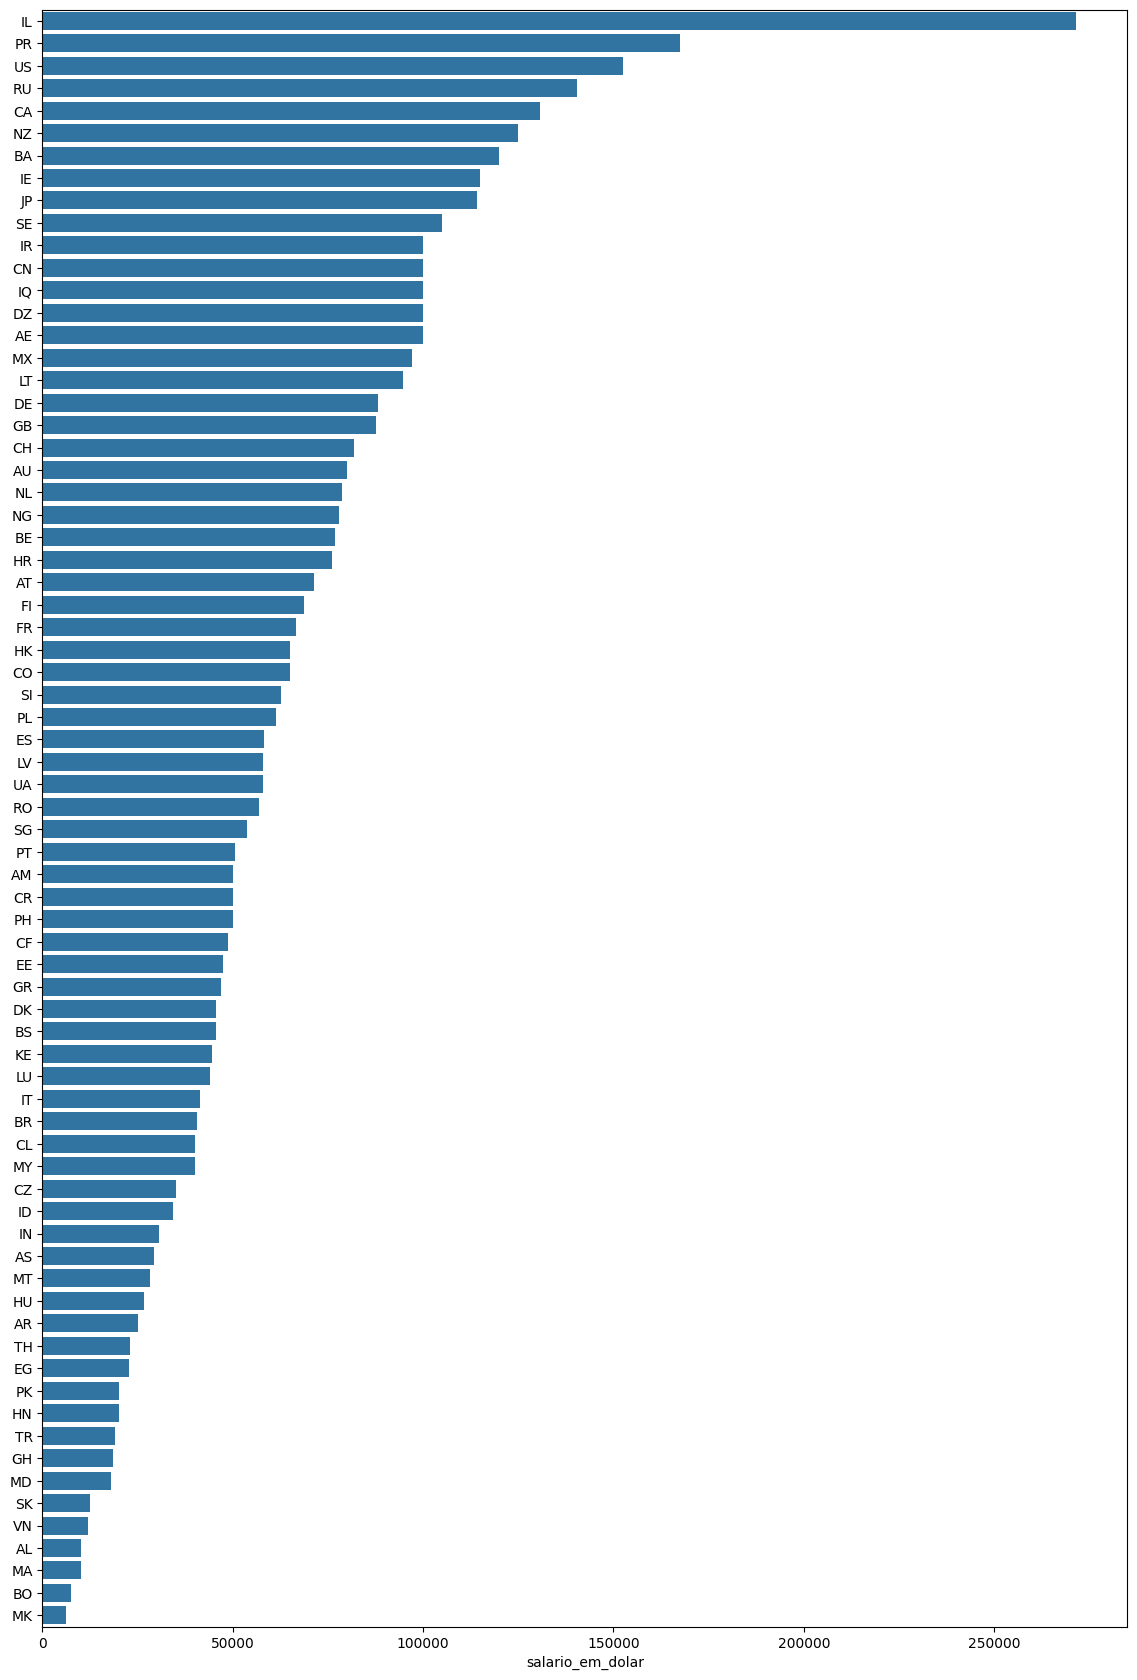

In [159]:
plot_large_classes_by_mean('local_empresa')

##### residencia_empregado x salario_em_dolar

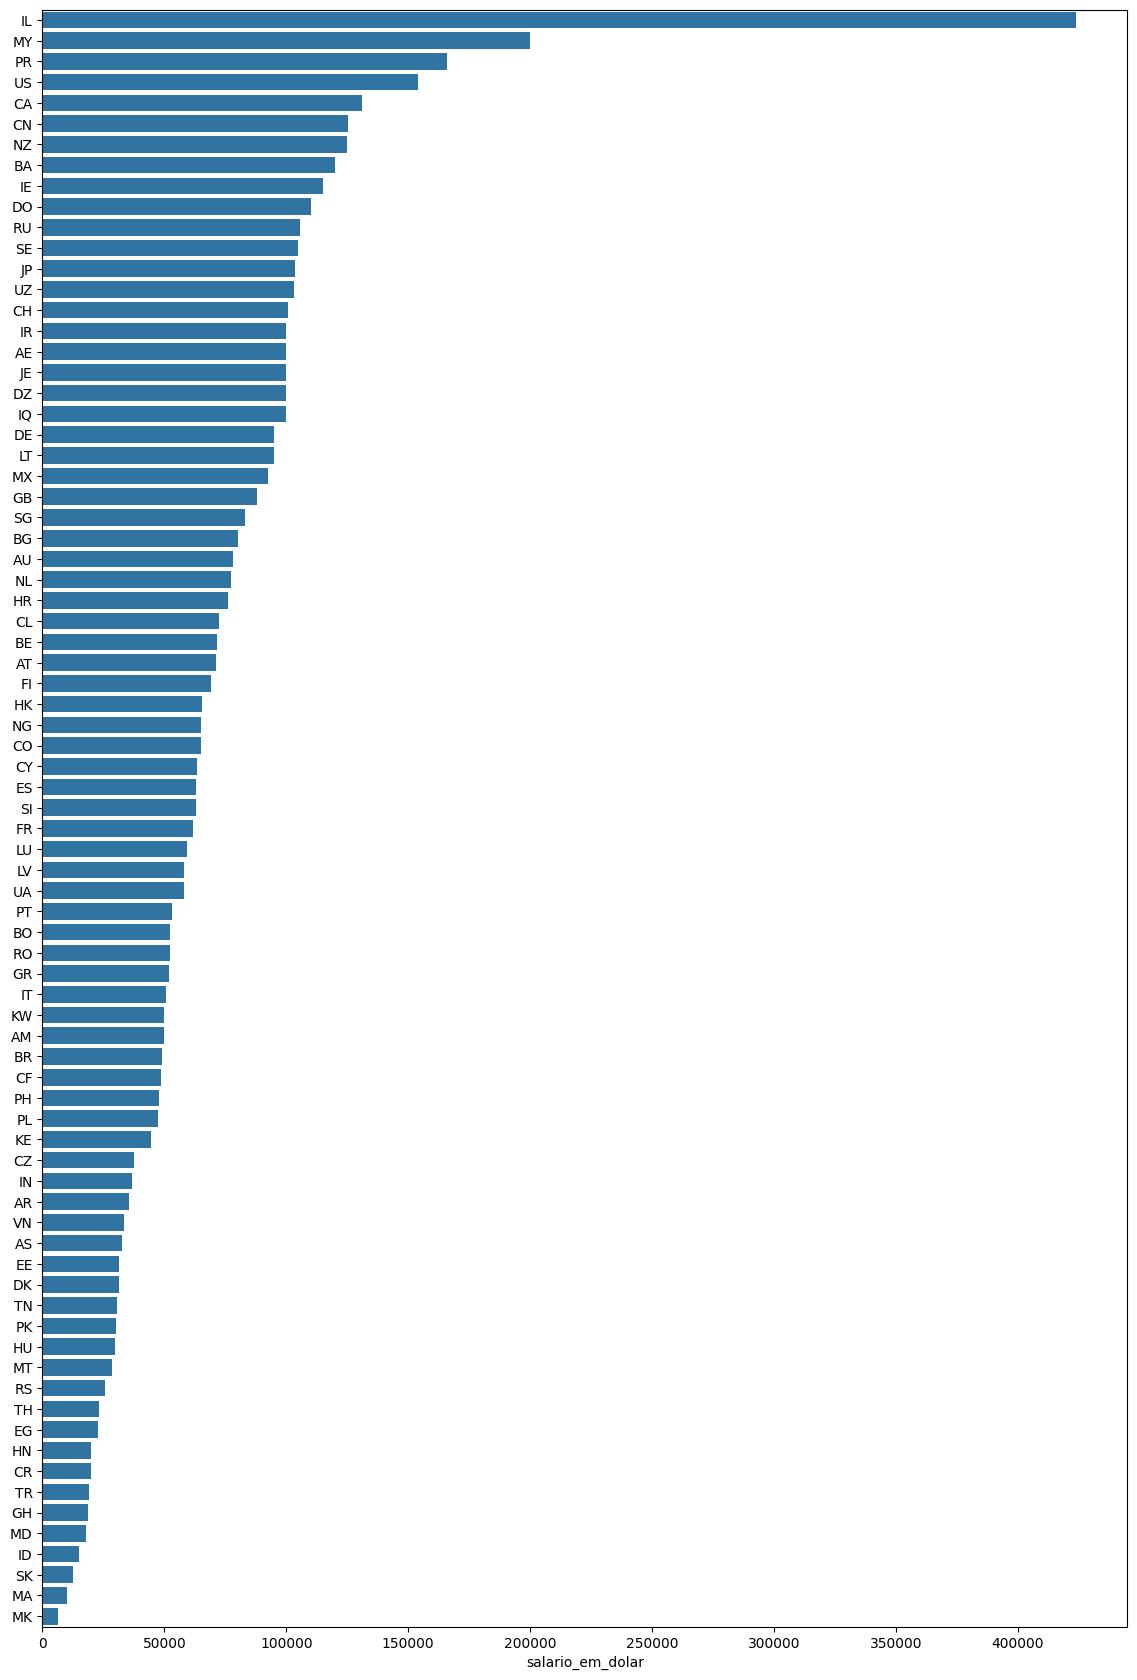

In [160]:
plot_large_classes_by_mean('residencia_empregado')

#### tamanho_empresa x salario_em_dolar

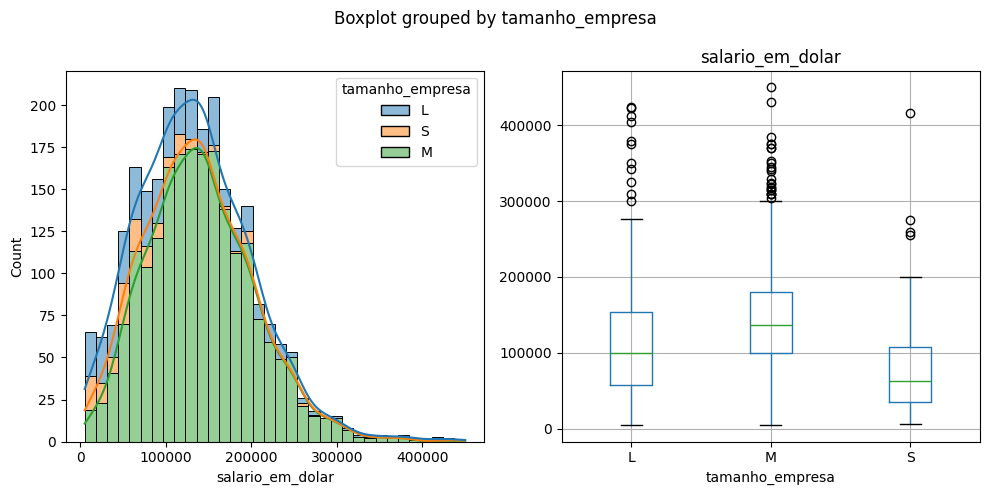

In [161]:
gen_graphics('tamanho_empresa')

Empresas pequenas normalmente não possuem pessoas que recebem salários maiores que 200.000 doláres.

#### Resumo e conclusão da análise exploratória

* O atributo #ano_trabalho e percentual_remoto serão considerados como atributos categóricos;
* O atributo salario foi removido do dataset;
* O atributo salario_em_dolar e #ano_trabalho possuem uma correlação fraca, ou seja, #ano_trabalho possivelmente influencia levemente o atributo salário_em_dolar;
* O atributo percentual_remoto e #ano_trabalho possuem uma correlação, mas como é uma correlação fraca, estes atributos não devem ser reduzidos a um único atributo;
* A partir da análise dos atributos categóricos em relação a coluna salario_em_dolar não foi possível perceber nenhum padrão entre as classes de cada atributo que pudessem se beneficiar de uma transformação, por ex., reduzir o número de classes de um atributo por apresentarem comportamentos similares em relação ao atributo alvo. Dessa forma, cada classe dos atributos categóricos serão transformados para um valor numérico, e logo após, todos os atributos categóricos sofrerão transformações one-hot encoding.
* Os gráficos apresentados na análise exploratória permitem retirar diversas informações acerca dos salários do usuários, por ex., pessoas com o cargo Lead tendem a ter um salário maior. Estas informações são relevantes para uma empresa e entendimento dos dados, mas devido a complexidade dos dados é difícil ter certeza se um modelo se beneficiará de transformações, por ex., transformar todas as classes que contém a palavra 'Lead' no atributo titulo_trabalho para um único atributo categórico indicando que a pessoa possui um cargo 'Lead'. Portanto as categorias originais de cada atributo serão mantidas para treinar o modelo.
* É possível derivar o atributo titulo_trabalho para indicar qual o tipo de trabalho ela possui. Para isso, a última palavra de cada observação deste atributo será utilizada. No entanto, primeiro serão realizados treinamentos com os dados originais e depois acrescentado este atributo para analisar se foi benéfico ou não o seu acréscimo.

## Engenharia de atributos

### Definindo váriaveis para *features* e *label*#

In [162]:
label = ['salario_em_dolar']
features = list(set(df.columns) - set(label))

### Cópia do dataset

In [163]:
df_cp = df.copy()

### Transformando atributos categóricos

#### Função para mapear valores categóricos em valores numéricos dado uma coluna

In [164]:
def map_categoric_values(df,column):
    unique_values = list(df[column].unique())
    for i,value in enumerate(unique_values):
        df[column][df[column] == value] = i
        

#### Mapeando categorias para valores numéricos

In [165]:
for column in features:
    map_categoric_values(df_cp,column)

In [166]:
display(df_cp)
display(df)

,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
0,0,0,0,0,0,85847,0,1,0,0
1,0,1,1,1,1,30000,1,1,1,1
2,0,1,1,1,1,25500,1,1,1,1
3,0,0,0,2,1,175000,2,1,2,2
4,0,0,0,2,1,120000,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...
3750,2,0,0,2,1,412000,1,1,1,0
3751,3,1,0,0,1,151000,1,1,1,0
3752,2,2,0,2,1,105000,1,1,1,1
3753,2,2,1,20,1,100000,1,1,1,0


,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,USD,100000,US,100,US,L


##### Função para transformar atributos categóricos numéricos em one-hot-encoding

In [167]:
def one_hot_encoding(df,columns):
    df_cp[columns] = df[columns].astype(str)
    dummies = pd.get_dummies(df_cp[columns])
    columns = dummies.columns
    df_dummies = pd.concat([dummies,df_cp[label]],axis=1)
    return df_dummies,columns

### Treinamento

#### TrainingHistory

Classe utilizada para salvar as métricas obtidas no dataset de validação durante o treinamento e plotar os gráficos de cada métrica ao longo das épocas ao final do treinamento. Este procedimento permite visualizar claramente o comportamento do modelo e identificar convergências ou overfitting.

In [168]:
class TrainingHistory:
    def __init__(self):
        self.mae_scores = []
        self.mse_scores = []
        self.r2_scores = []
        self.scores_list = [self.mae_scores,self.mse_scores,self.r2_scores]
        
    def add_scores(self, scores):
        for i,score in enumerate(scores):
            self.scores_list[i].append(score)

    def plot_scores(self):
        num_rows = 1
        num_cols = 3

        fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))
        axes = axes.flatten()

        for i, (score,label) in enumerate(zip(self.scores_list,['MAE','MSE','R2'])):
            axes[i].plot(score,label=label)
            axes[i].set_xlabel('Epoch')
            axes[i].set_ylabel(label)


        axes[1].set_title('Graphic of MAE, MSE and R2 metrics in validation dataset for each epoch')
        plt.tight_layout()
        plt.show()
        

#### Definindo funções auxiliares

##### Imports

In [169]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import torch

##### Função para separar um conjunto de dados em dois outros conjuntos de dados

In [170]:
def split_data(df,test_size):
    df_train, df_test = train_test_split(df, test_size=test_size, random_state=42)
    df_train = df_train.reset_index().drop('index',axis=1)
    df_test = df_test.reset_index().drop('index',axis=1)
    return df_train,df_test

##### Função para calcular a métrica r2

In [171]:
def r2_score(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    r2 = 1 - ss_res / ss_tot
    return r2

##### Função para calcular e apresentar as métricas MAE, MSE e R2
Esta função permite analisar o comportamento de diferentes métricas, similar a função de report para classificação do sklearn.

In [172]:
def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true,y_pred)
    mse = mean_squared_error(y_true,y_pred)
    r2 = r2_score(y_true,y_pred)
    print(f"MAE = {mae} - MSE = {mse} - R2 = {r2}")
    return mae,mse,r2

##### Funções de treinamento e avaliação
As funções abaixo realizam o treinamento (*train*) e avaliação (*eval*) de um modelo feito em PyTorch.

In [173]:
def train(model,optim,loss_fn,train_dataloader,val_dataset,epochs):
    training_history =  TrainingHistory()
    for epoch in range(epochs):
        model.train()
        for featuress,target in train_dataloader:
            optim.zero_grad()
            predictions = model(featuress)     
            loss = loss_fn(predictions, target)
            loss.backward()
            optim.step()
        metrics = eval(model,val_dataset)
        training_history.add_scores(metrics)
        print(f"Training metrics: epoch {epoch + 1} - loss {loss}")
    training_history.plot_scores()

def eval(model,test_dataset):
    model.eval()
    predictions = model(test_dataset[:][0])
    print('Metrics results:')
    return regression_report(test_dataset[:][1],predictions.detach().numpy())

#### Modelo Versão 1 (ModeloV1)
O modelo abaixo consiste de uma rede neural MLP, onde entre cada camada existe uma função de ativação LeakyReLU.

In [174]:
import torch
import torch.functional
import torch.nn as nn

class ModelV1(nn.Module):
    def __init__(self,dims) -> None:
        super(ModelV1,self).__init__()
        layers = []
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1])) 
            layers.append(nn.LeakyReLU(negative_slope=0.9))
        
        self.mlp = nn.Sequential(*layers)
    def forward(self,features):
        return self.mlp(features)

#### Criando datasets para o PyTorch
A classe abaixo é utilizada para preparar os dados diretamente para uso no PyTorch.

In [175]:
from torch.utils.data import Dataset
from src.transforms.to_torch_tensor import NumpyToTorchTensor
from torch.utils.data import DataLoader
#Tipo do dado
dtype = torch.float32
#Transformador
transform = NumpyToTorchTensor(dtype=dtype)
class SalarioDataset(Dataset):
    def __init__(self, df, features_columns,label_column,transform_feat = None,transform_label = None):
        self.x = df[features_columns].values
        self.y = df[label_column].values
        self.transform_feat = transform_feat
        self.transform_label = transform_label if transform_label else transform_feat
        self.len = len(self.x)

    def __getitem__(self,index):
        if self.transform_feat:
            return self.transform_feat(self.x[index]),self.transform_label(self.y[index])
        return self.x[index],self.y[index]

    def __len__(self):
        return self.len

#### Pipeline de treinamento
A função abaixo automatiza o processo de engenharia de atributos, treinamento e avaliação de um modelo PyTorch.

In [176]:
def pytorch_train_eval_pipeline(epochs,class_model,loss_fn,batch_size,df,feature_columns,label_column,**kargs):
    new_df = df.copy()

    transform_data_functions = kargs['transform_data_functions']
    transform_functions = kargs['transform_functions']
    hyperparameters = kargs['hyperparameters']
    
    for transform_function in transform_data_functions:
        new_df,feature_columns = transform_function(new_df,feature_columns)
    
    df_train, df_test = split_data(new_df, 0.15)
    df_train, df_val = split_data(df_train, 0.1)
    model = class_model(hyperparameters)

    optim = torch.optim.Adam(list(model.parameters()))

    train_dataset = SalarioDataset(df_train,feature_columns,label_column, *transform_functions)
    test_dataset = SalarioDataset(df_test,feature_columns,label_column, *transform_functions)
    val_dataset = SalarioDataset(df_val,feature_columns,label_column, *transform_functions)

    train_dataloader = DataLoader(train_dataset,batch_size, shuffle=True, num_workers=2)

    train(model,optim,loss_fn,train_dataloader,val_dataset,epochs)
    print('Evaluating model in test dataset...')
    eval(model,test_dataset)
    return model

#### Treinamento e avaliação do ModeloV1
O modelo versão 1 é treinado com transformações one-hot encoding nos dados e utilizando MAE como função de perda.

Metrics results:
MAE = 138638.84375 - MSE = 23566307328.0 - R2 = -4.423055171966553
Training metrics: epoch 1 - loss 136083.359375
Metrics results:
MAE = 138638.796875 - MSE = 23566290944.0 - R2 = -4.423050880432129
Training metrics: epoch 2 - loss 136923.890625
Metrics results:
MAE = 138638.703125 - MSE = 23566270464.0 - R2 = -4.423046588897705
Training metrics: epoch 3 - loss 134795.25
Metrics results:
MAE = 138638.65625 - MSE = 23566247936.0 - R2 = -4.423041820526123
Training metrics: epoch 4 - loss 135795.125
Metrics results:
MAE = 138638.53125 - MSE = 23566219264.0 - R2 = -4.423035144805908
Training metrics: epoch 5 - loss 132505.921875
Metrics results:
MAE = 138638.40625 - MSE = 23566182400.0 - R2 = -4.423027038574219
Training metrics: epoch 6 - loss 134470.453125
Metrics results:
MAE = 138638.203125 - MSE = 23566131200.0 - R2 = -4.4230146408081055
Training metrics: epoch 7 - loss 137453.6875
Metrics results:
MAE = 138637.984375 - MSE = 23566065664.0 - R2 = -4.422999858856201
Tra

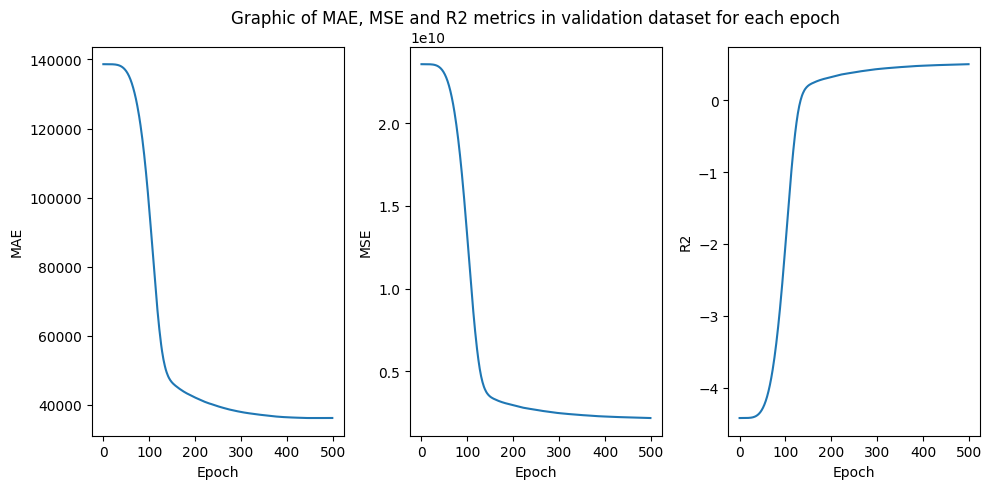

Evaluating model in test dataset...
Metrics results:
MAE = 36642.5 - MSE = 2480423424.0 - R2 = 0.43137550354003906


In [177]:
epochs = 500
loss_fn = nn.L1Loss()
model = pytorch_train_eval_pipeline(epochs,
                                    ModelV1,
                                    loss_fn,
                                    512,
                                    df_cp,
                                    features,
                                    label,
                                    transform_data_functions = [one_hot_encoding],
                                    hyperparameters = [280,20,30,15,1],
                                    transform_functions = [transform] )

A partir da métrica R2 percebe-se que o modelo não obteve bons resultados. Assim, novas transformações nos dados serão realizadas. Para isso, uma rede de token embedding será utilizada no modelo para aprender a transformar as categorias de cada atributo ao invés de utilizar one-hot encoding. 

### Novas transformações nos dados

##### Carregando features dos dados originais

In [178]:
features2 = list(set(df.columns) - set(label))

##### Função para transformar todos os valores categóricos em valores numéricos
Esta função mapeia as categorias de todo o dataset para um valor inteiro distinto.

In [179]:
from src.utils.util_pre_processor import UtilPreProcessor

def transform_categoric_values_to_token_values(df,features):
    df_cp2 = df.copy()
    df_cp2[features] = df_cp2[features].astype(str)
    words = UtilPreProcessor.get_unique_values_by_columns(df_cp2,features)
    vocab_to_index, _ = UtilPreProcessor.creat_vocab(words)
    print(len(vocab_to_index))
    for column in features:
        unique_values = list(df_cp2[column].unique())
        for value in unique_values:
            df_cp2[column][df_cp2[column] == value] = vocab_to_index[value]
    return df_cp2,features

#### Modelo versão 2
O modelo abaixo acrescenta uma rede de Embedding no modelo versão 1 para aprender a representar cada categoria.

In [180]:
import torch
import torch.functional
import torch.nn as nn

class ModelV2(nn.Module):
    def __init__(self,hyperparameters) -> None:
        super(ModelV2,self).__init__()
        layers = []
        len_vocab = hyperparameters[0]
        dim_embedd= hyperparameters[1]
        dims = hyperparameters[2:]
        self.embedding = nn.Embedding(len_vocab,dim_embedd)
        for i in range(len(dims) - 1):
            layers.append(nn.Linear(dims[i], dims[i+1],dtype=torch.float32)) 
            layers.append(nn.LeakyReLU(negative_slope=0.2))
        
        self.mlp = nn.Sequential(*layers)
    def forward(self,features):
        x = self.embedding(features)
        x = torch.nn.functional.leaky_relu(x.view(x.shape[0],-1),negative_slope=0.2)
        return self.mlp(x)

#### Definindo transformador para os valores categóricos passarem corretamente na rede de embedding

In [181]:
transform_int = NumpyToTorchTensor(dtype=torch.long)

##### Treinamento e avaliação do modelo versão 2

209
Metrics results:
MAE = 138633.34375 - MSE = 23564726272.0 - R2 = -4.422691345214844
Training metrics: epoch 1 - loss 131380.34375
Metrics results:
MAE = 138622.75 - MSE = 23561691136.0 - R2 = -4.421993732452393
Training metrics: epoch 2 - loss 134844.765625
Metrics results:
MAE = 138605.203125 - MSE = 23556655104.0 - R2 = -4.420834541320801
Training metrics: epoch 3 - loss 134128.59375
Metrics results:
MAE = 138578.15625 - MSE = 23548909568.0 - R2 = -4.4190521240234375
Training metrics: epoch 4 - loss 134247.875
Metrics results:
MAE = 138538.78125 - MSE = 23537623040.0 - R2 = -4.416454792022705
Training metrics: epoch 5 - loss 132747.765625
Metrics results:
MAE = 138483.5625 - MSE = 23521812480.0 - R2 = -4.412815570831299
Training metrics: epoch 6 - loss 131652.03125
Metrics results:
MAE = 138408.40625 - MSE = 23500312576.0 - R2 = -4.4078688621521
Training metrics: epoch 7 - loss 130557.078125
Metrics results:
MAE = 138308.640625 - MSE = 23471790080.0 - R2 = -4.401305198669434
Trai

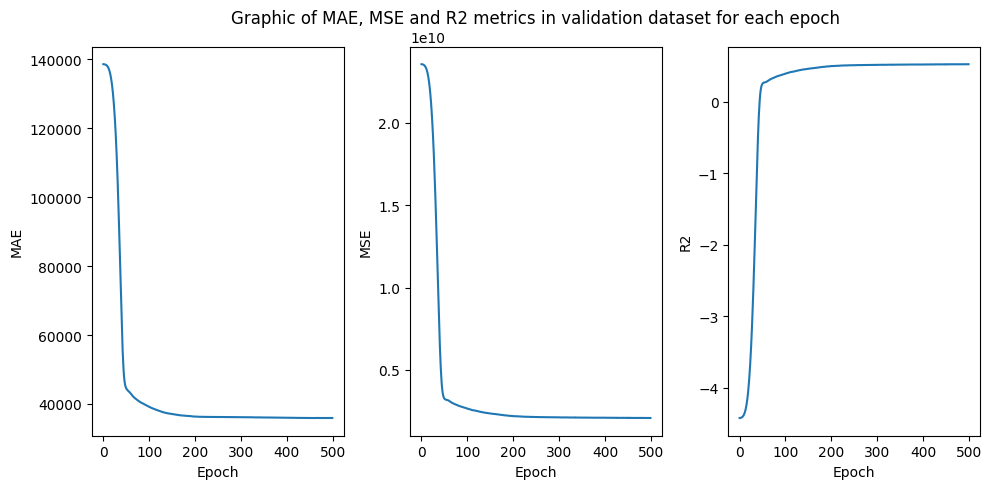

Evaluating model in test dataset...
Metrics results:
MAE = 36136.0625 - MSE = 2455562752.0 - R2 = 0.4370746612548828


In [182]:
dim_embed_vocab = 256
first_dim_mlp = dim_embed_vocab*9
model = pytorch_train_eval_pipeline(epochs,ModelV2,loss_fn,512,df,features2,label,
                                    transform_data_functions = [transform_categoric_values_to_token_values],
                                    hyperparameters = [209,dim_embed_vocab,first_dim_mlp,128,64,1],
                                    transform_functions = [transform_int,transform] )

Mesmo acrescentando uma rede de embedding no modelo não foi possível obter uma melhoria relevante nos resultados. Na próxima seção serão utilizados outros algoritmos diferentes para analisar possíveis melhorias.

### Avaliando resultados dos algoritmos SVM e LR
Para estes algoritmos, a transformação one-hot encoding será utilizada.

#### Definindo dataframe a ser utlizado para treinamento

In [183]:
df_cp3 = df.copy()
df_cp3[['#ano_trabalho','percentual_remoto']] = df_cp3[['#ano_trabalho','percentual_remoto']].astype(str)


#### Transformando dados em one-hot encoding

In [184]:
df_cp3,features3 = one_hot_encoding(df_cp3,features2)

#### Função para treinar e avaliar um modelo do sklearn

In [185]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
from sklearn.linear_model import LinearRegression

def train_eval_sklearn_model_with_cv_and_grid_search(model,param_grid,df,feature_columns,label_column):
    df_train, df_test = split_data(df, 0.20)
   
    scoring = make_scorer(r2_score)

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=10)

    grid_search.fit(df_train[feature_columns], df_train[label_column])
    y_pred = grid_search.predict(df_test[feature_columns])

    regression_report(df_test[label_column],y_pred)

    print("Melhores parâmetros encontrados:", grid_search.best_params_)
    print("Melhor pontuação (R² Score):", grid_search.best_score_)


#### Treinamento e avaliação do SVM

In [186]:
param_grid = {
        'C': [0.1,100,100000],
        'epsilon': [0.1, 0.01, 0.001],
        'kernel': ['poly','rbf','linear','sigmoid']
    }
train_eval_sklearn_model_with_cv_and_grid_search(svm.SVR(),param_grid,df_cp3,features3,label)

MAE = 37643.80871347976 - MSE = 2595270634.877288 - R2 = 0.406669413399227
Melhores parâmetros encontrados: {'C': 100000, 'epsilon': 0.1, 'kernel': 'rbf'}
Melhor pontuação (R² Score): 0.4442541517463554


O modelo treinado pelo SVM apresentou um pior resultado do que os modelos anteriores no dataset de teste (R2 = 40.6%). Percebe-se nos resultados acima que o valor para o hiper-parâmetro C foi muito alto, indicando a necessidade de um fator de regularização, como visto também na análise exploratória a presença de outliers. 

Assim, outliers serão retirados do dataset para analisar novamente os resultados dos modelos.

#### Treinamento e avaliação da Regressão Linear

In [187]:
param_grid = {
       'fit_intercept':[True,False]
    }

train_eval_sklearn_model_with_cv_and_grid_search(LinearRegression(),param_grid,df_cp3,features3,label)

MAE = 21006925787716.92 - MSE = 1.280447126562432e+28 - R2 = -2.927357303337593e+18
Melhores parâmetros encontrados: {'fit_intercept': False}
Melhor pontuação (R² Score): -8.87050669476064e+21


O modelo treinado pela regressão linear foi incapaz de se ajustar aos dados.

### Derivando o atributo titulo_trabalho
Como os modelos continuam apresentando resultados ruins, será derivado um novo atributo do atributo titulo_trabalho, o qual será obtido extraindo o tipo de trabalho que a pessoa possui. Por ex., se a pessoa possui o trabalho ML Engineer o atributo derivado será Engineer.

#### Obtendo novo atributo

In [188]:
df_cp4 = df.copy()
df_cp4['derivate_att'] = df['titulo_trabalho'].map(lambda x: x.split()[-1])

In [189]:
df_cp4.head()

,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa,derivate_att
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L,Scientist
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S,Engineer
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S,Engineer
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M,Scientist
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M,Scientist


#### Treinamento e avaliação com o melhor modelo do PyTorch

227
Metrics results:
MAE = 138631.15625 - MSE = 23564095488.0 - R2 = -4.422546077024401
Training metrics: epoch 1 - loss 136281.46875
Metrics results:
MAE = 138616.1875 - MSE = 23559778304.0 - R2 = -4.421553114334122
Training metrics: epoch 2 - loss 131783.65625
Metrics results:
MAE = 138591.40625 - MSE = 23552636928.0 - R2 = -4.419909978202333
Training metrics: epoch 3 - loss 133442.96875
Metrics results:
MAE = 138553.375 - MSE = 23541680128.0 - R2 = -4.417388166675894
Training metrics: epoch 4 - loss 130737.6015625
Metrics results:
MAE = 138497.96875 - MSE = 23525726208.0 - R2 = -4.413717281757509
Training metrics: epoch 5 - loss 134859.53125
Metrics results:
MAE = 138420.296875 - MSE = 23503378432.0 - R2 = -4.408574534409404
Training metrics: epoch 6 - loss 129962.6484375
Metrics results:
MAE = 138314.59375 - MSE = 23472990208.0 - R2 = -4.401582022824796
Training metrics: epoch 7 - loss 129911.578125
Metrics results:
MAE = 138174.1875 - MSE = 23432675328.0 - R2 = -4.392304749864668


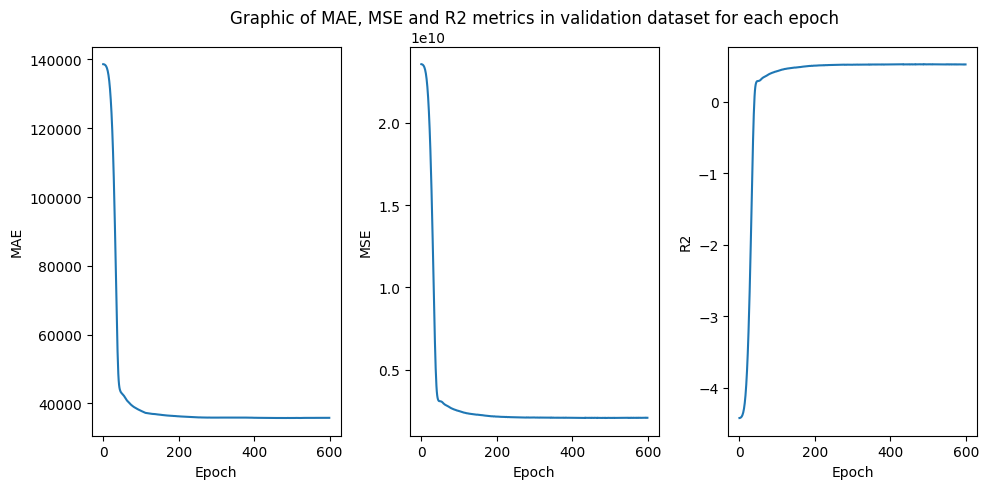

Evaluating model in test dataset...
Metrics results:
MAE = 35999.19140625 - MSE = 2452083200.0 - R2 = 0.43787223748202597


In [190]:
first_dim_mlp = dim_embed_vocab*10
features4 = list(set(df_cp4.columns) - set(label))
model = pytorch_train_eval_pipeline(600,ModelV2,loss_fn,512,df_cp4,features4,label,
                                    transform_data_functions = [transform_categoric_values_to_token_values],
                                    hyperparameters = [227,dim_embed_vocab,first_dim_mlp,128,64,1],
                                    transform_functions = [transform_int,transform] )

O modelo obteve um resultado levemente melhor com o acréscimo deste atributo

#### Treinamento com SVM

In [191]:
df_cp4 = df.copy()
df_cp4['derivate_att'] = df['titulo_trabalho'].map(lambda x: x.split()[-1])

In [192]:
df_cp4,features4 = one_hot_encoding(df_cp4,features4)

In [193]:
param_grid = {
        'C': [100000],
        'epsilon': [1,0.1,0.5],
        'kernel': ['poly','rbf','linear','sigmoid']
    }
train_eval_sklearn_model_with_cv_and_grid_search(svm.SVR(),param_grid,df_cp4,features4,label)

MAE = 37420.23909278928 - MSE = 2578409485.6314163 - R2 = 0.4105242081317576
Melhores parâmetros encontrados: {'C': 100000, 'epsilon': 1, 'kernel': 'rbf'}
Melhor pontuação (R² Score): 0.44890850492409246


### Analisando a importância das features
Para analisar as features importantes para o modelo, serão realizados vários treinamentos iterativos, onde cada treinamento contará com o acréscimo de uma feature. Como a diferença entre os resultados dos modelos não foi relevante e a função de treinamento do PyTorch apresenta gráficos, para fins de simplicidade o modelo versão 1 será utilizado para este propósito.

Adding feature titulo_trabalho
Metrics results:
MAE = 138639.1875 - MSE = 23566407680.0 - R2 = -4.423078364315911
Training metrics: epoch 1 - loss 134287.09375
Metrics results:
MAE = 138639.15625 - MSE = 23566393344.0 - R2 = -4.42307542208106
Training metrics: epoch 2 - loss 137358.265625
Metrics results:
MAE = 138639.09375 - MSE = 23566379008.0 - R2 = -4.423072332436147
Training metrics: epoch 3 - loss 131432.25
Metrics results:
MAE = 138639.046875 - MSE = 23566366720.0 - R2 = -4.423069039004107
Training metrics: epoch 4 - loss 129440.7890625
Metrics results:
MAE = 138639.015625 - MSE = 23566350336.0 - R2 = -4.42306488219479
Training metrics: epoch 5 - loss 130447.796875
Metrics results:
MAE = 138638.921875 - MSE = 23566325760.0 - R2 = -4.423060065709554
Training metrics: epoch 6 - loss 128142.21875
Metrics results:
MAE = 138638.8125 - MSE = 23566303232.0 - R2 = -4.423054487116144
Training metrics: epoch 7 - loss 131564.65625
Metrics results:
MAE = 138638.71875 - MSE = 23566274560.0 -

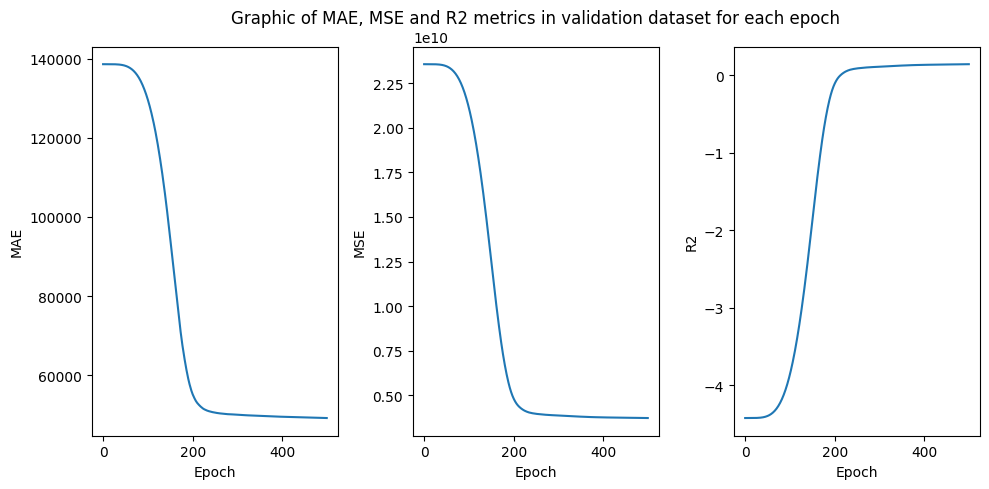

Evaluating model in test dataset...
Metrics results:
MAE = 49943.9296875 - MSE = 3917092096.0 - R2 = 0.10202633795337857
----------------------------------------------------------------------------------------------------
Adding feature tipo_emprego
Metrics results:
MAE = 138638.96875 - MSE = 23566346240.0 - R2 = -4.423064070462498
Training metrics: epoch 1 - loss 134994.453125
Metrics results:
MAE = 138638.921875 - MSE = 23566325760.0 - R2 = -4.423059477765916
Training metrics: epoch 2 - loss 130811.015625
Metrics results:
MAE = 138638.828125 - MSE = 23566305280.0 - R2 = -4.423054776390397
Training metrics: epoch 3 - loss 133468.703125
Metrics results:
MAE = 138638.765625 - MSE = 23566282752.0 - R2 = -4.423049632067144
Training metrics: epoch 4 - loss 132197.640625
Metrics results:
MAE = 138638.671875 - MSE = 23566254080.0 - R2 = -4.423043472241205
Training metrics: epoch 5 - loss 130630.8125
Metrics results:
MAE = 138638.546875 - MSE = 23566225408.0 - R2 = -4.423036426779205
Training

Exception ignored in: <function _releaseLock at 0x708960bc96c0>
Traceback (most recent call last):
  File "/usr/lib/python3.11/logging/__init__.py", line 237, in _releaseLock
    def _releaseLock():
    
KeyboardInterrupt: 


Metrics results:
MAE = 136302.453125 - MSE = 22920630272.0 - R2 = -4.274472765467109
Training metrics: epoch 67 - loss 134178.234375
Metrics results:
MAE = 136140.453125 - MSE = 22876272640.0 - R2 = -4.264265544970151
Training metrics: epoch 68 - loss 132168.296875
Metrics results:
MAE = 135970.109375 - MSE = 22829678592.0 - R2 = -4.253543556080992
Training metrics: epoch 69 - loss 128820.9921875
Metrics results:
MAE = 135791.078125 - MSE = 22780780544.0 - R2 = -4.24229040185816
Training metrics: epoch 70 - loss 132122.015625
Metrics results:
MAE = 135603.125 - MSE = 22729515008.0 - R2 = -4.230493468856823
Training metrics: epoch 71 - loss 128712.4921875
Metrics results:
MAE = 135405.96875 - MSE = 22675804160.0 - R2 = -4.21813378215919
Training metrics: epoch 72 - loss 133133.46875
Metrics results:
MAE = 135199.203125 - MSE = 22619572224.0 - R2 = -4.205193731443848
Training metrics: epoch 73 - loss 125198.9765625
Metrics results:
MAE = 134982.671875 - MSE = 22560765952.0 - R2 = -4.1916

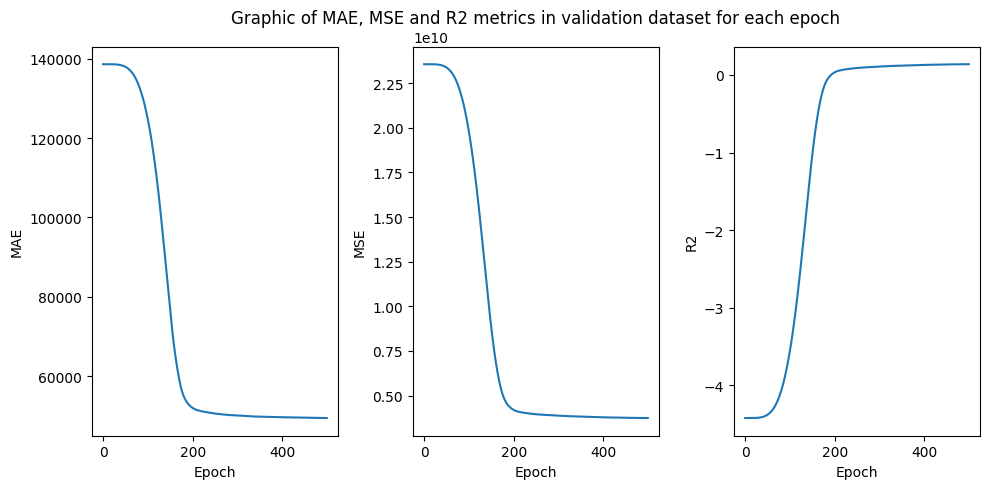

Evaluating model in test dataset...
Metrics results:
MAE = 48889.15625 - MSE = 3785423872.0 - R2 = 0.1322106323258465
----------------------------------------------------------------------------------------------------
Adding feature moeda_salario
Metrics results:
MAE = 138639.03125 - MSE = 23566358528.0 - R2 = -4.42306716800886
Training metrics: epoch 1 - loss 134939.546875
Metrics results:
MAE = 138638.953125 - MSE = 23566338048.0 - R2 = -4.423062440506464
Training metrics: epoch 2 - loss 137695.5625
Metrics results:
MAE = 138638.890625 - MSE = 23566317568.0 - R2 = -4.4230573368891735
Training metrics: epoch 3 - loss 129473.28125
Metrics results:
MAE = 138638.796875 - MSE = 23566292992.0 - R2 = -4.42305168201131
Training metrics: epoch 4 - loss 127722.9375
Metrics results:
MAE = 138638.6875 - MSE = 23566264320.0 - R2 = -4.423045257291182
Training metrics: epoch 5 - loss 132634.484375
Metrics results:
MAE = 138638.5625 - MSE = 23566231552.0 - R2 = -4.423037674942679
Training metrics: 

KeyboardInterrupt: 

In [194]:
current_features = []
def calc_qtd_one_hot_encoding(df):
    total_features = 0
    for column in df.columns:
        unique_values = df[column].unique().tolist()
        total_features += len(unique_values)
    return total_features

for feature in features:
    current_features.append(feature)
    print("Adding feature",feature)
    model = pytorch_train_eval_pipeline(epochs,ModelV1,
                                    loss_fn,
                                    512,
                                    df,
                                    current_features,
                                    label,
                                    transform_data_functions = [one_hot_encoding],
                                    hyperparameters = [calc_qtd_one_hot_encoding(df[current_features]),20,30,15,1],
                                    transform_functions = [transform] )
    print('-'*100)

Ao final deste notebook é apresentada uma discussão acerca destes resultados.

### Retirando outliers

Como visto durante o treinamento do modelo com SVM, o dataset contém vários outliers, o que pode estar dificultando o aprendizado do modelo. Assim outliers serão removidos e os melhores modelos serão treinados novamente.

#### Função para remover outliers
A função abaixo remove observações que contém salários que são outliers a partir da fórmula que os boxplots utilizam para identificar outliers.

In [196]:
def remove_outliers(df):
    Q1 = df['salario_em_dolar'].quantile(0.25)
    Q3 = df['salario_em_dolar'].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df['salario_em_dolar'] < (Q1 - 1.5 * IQR)) |(df['salario_em_dolar'] > (Q3 + 1.5 * IQR)))]
    return df_out
df_cp5 = remove_outliers(df)

In [197]:
df_cp5

,#ano_trabalho,nivel_experiencia,tipo_emprego,titulo_trabalho,moeda_salario,salario_em_dolar,residencia_empregado,percentual_remoto,local_empresa,tamanho_empresa
0,2023,SE,FT,Principal Data Scientist,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...
3749,2021,SE,FT,Data Specialist,USD,165000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,USD,100000,US,100,US,L


#### Treinando melhor modelo PyTorch nos dados sem outliers

225
Metrics results:
MAE = 130825.3046875 - MSE = 21324853248.0 - R2 = -4.065734238689338
Training metrics: epoch 1 - loss 129948.578125
Metrics results:
MAE = 130816.21875 - MSE = 21322403840.0 - R2 = -4.065152225224107
Training metrics: epoch 2 - loss 131493.03125
Metrics results:
MAE = 130800.6953125 - MSE = 21318225920.0 - R2 = -4.064159245336226
Training metrics: epoch 3 - loss 126974.6796875
Metrics results:
MAE = 130776.3125 - MSE = 21311660032.0 - R2 = -4.062599310574721
Training metrics: epoch 4 - loss 130393.71875
Metrics results:
MAE = 130740.09375 - MSE = 21301907456.0 - R2 = -4.060282879123652
Training metrics: epoch 5 - loss 132709.453125
Metrics results:
MAE = 130688.4921875 - MSE = 21288024064.0 - R2 = -4.056984829730018
Training metrics: epoch 6 - loss 132218.6875
Metrics results:
MAE = 130617.3359375 - MSE = 21268887552.0 - R2 = -4.052439055590337
Training metrics: epoch 7 - loss 129809.125
Metrics results:
MAE = 130521.6875 - MSE = 21243183104.0 - R2 = -4.04633315253

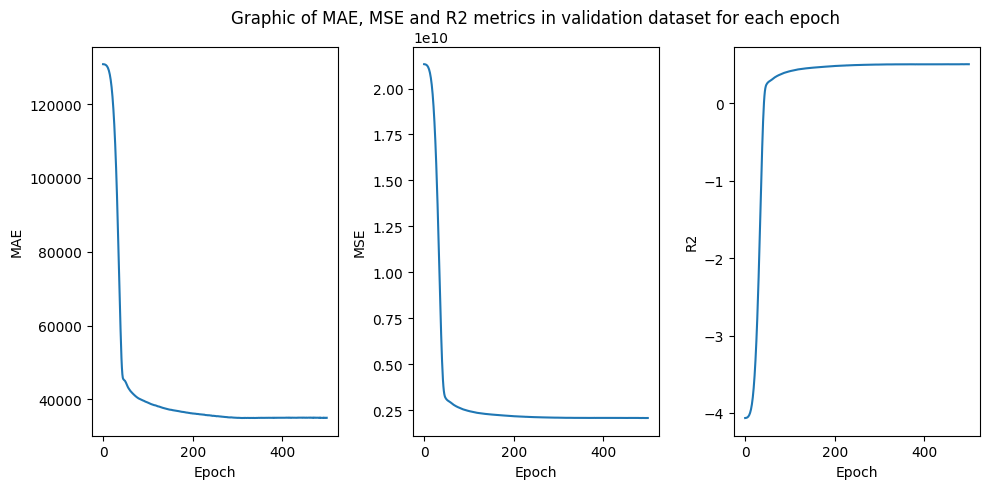

Evaluating model in test dataset...
Metrics results:
MAE = 34714.98828125 - MSE = 1963823232.0 - R2 = 0.5080165934670491


In [198]:
df_cp5['derivate_att'] = df_cp5['titulo_trabalho'].map(lambda x: x.split()[-1])
features5 = list(set(df_cp5.columns)-set(label))
model = pytorch_train_eval_pipeline(500,ModelV2,loss_fn,512,df_cp5,features5,label,
                                    transform_data_functions = [transform_categoric_values_to_token_values],
                                    hyperparameters = [225,dim_embed_vocab,first_dim_mlp,128,64,1],
                                    transform_functions = [transform_int,transform] )


#### Treinamento do SVM com os dados sem outliers

In [202]:
df_cp5['derivate_att'] = df_cp5['titulo_trabalho'].map(lambda x: x.split()[-1])
df_cp5,features5 = one_hot_encoding(df_cp5,features5)
param_grid = {
        'C': [100000,150000,200000],
        'epsilon': [0.1, 0.01, 0.001],
        'kernel': ['poly','rbf','linear','sigmoid']
    }
train_eval_sklearn_model_with_cv_and_grid_search(svm.SVR(),param_grid,df_cp5,features5,label)

MAE = 36413.435843274405 - MSE = 2171524738.0898757 - R2 = 0.5035461699623951
Melhores parâmetros encontrados: {'C': 100000, 'epsilon': 0.1, 'kernel': 'rbf'}
Melhor pontuação (R² Score): 0.5524427909024807


Ao remover os outliers os resultados foram melhorados, mas ainda assim os resultados não foram bons. Possivelmente este conjunto de dados não é suficiente para que um modelo aprenda a prever a variável salario_em_dolar, sendo necessário mais dados.

### Ajuste de hiper-parâmetros
Os hiper-parâmetros do modelo versão dois treinado nos dados sem outliers e com adição do atributo derivado serão ajustados, uma vez que este obteve os melhores resultados. Todos os ajustes consistem em variar a quantidade de neurônios de cada camada da MLP.

#### Ajuste 1

225
Metrics results:
MAE = 130802.0703125 - MSE = 21318539264.0 - R2 = -4.064233786431041
Training metrics: epoch 1 - loss 130588.421875
Metrics results:
MAE = 130635.875 - MSE = 21273481216.0 - R2 = -4.0535305809273146
Training metrics: epoch 2 - loss 133454.9375
Metrics results:
MAE = 130112.8359375 - MSE = 21132054528.0 - R2 = -4.019934442091592
Training metrics: epoch 3 - loss 131586.875
Metrics results:
MAE = 128866.0 - MSE = 20797155328.0 - R2 = -3.9403790291213285
Training metrics: epoch 4 - loss 128750.9453125
Metrics results:
MAE = 126320.1953125 - MSE = 20123287552.0 - R2 = -3.7803004508709384
Training metrics: epoch 5 - loss 124528.6328125
Metrics results:
MAE = 121621.140625 - MSE = 18913374208.0 - R2 = -3.4928854518990553
Training metrics: epoch 6 - loss 125485.0390625
Metrics results:
MAE = 113637.5078125 - MSE = 16937259008.0 - R2 = -3.0234574734608604
Training metrics: epoch 7 - loss 116680.1953125
Metrics results:
MAE = 100908.84375 - MSE = 14002640896.0 - R2 = -2.3263

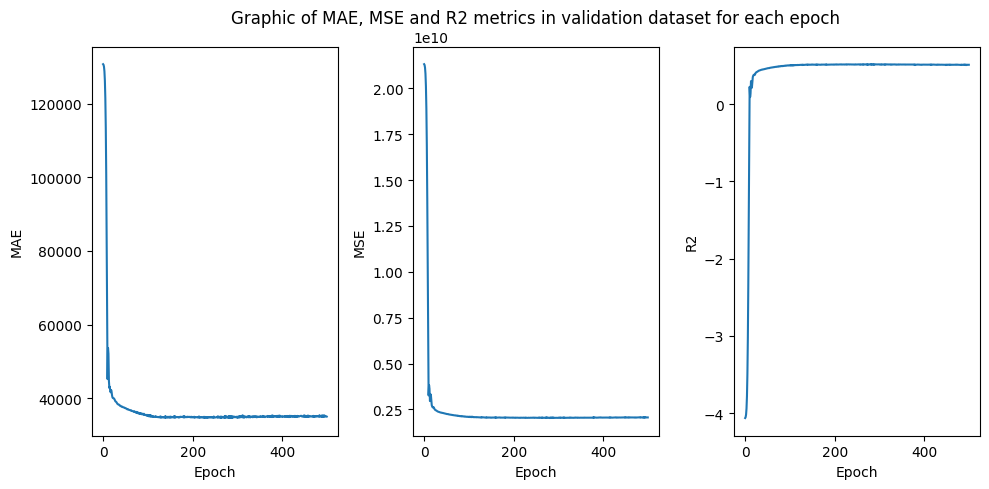

Evaluating model in test dataset...
Metrics results:
MAE = 34862.80859375 - MSE = 1966149632.0 - R2 = 0.5074337943854812


In [199]:
model = pytorch_train_eval_pipeline(500,ModelV2,loss_fn,512,df_cp5,features5,label,
                                    transform_data_functions = [transform_categoric_values_to_token_values],
                                    hyperparameters = [225,dim_embed_vocab,first_dim_mlp,1024,512,64,1],
                                    transform_functions = [transform_int,transform] )


#### Ajuste 2

225
Metrics results:
MAE = 130822.2421875 - MSE = 21324017664.0 - R2 = -4.065535571051651
Training metrics: epoch 1 - loss 131918.21875
Metrics results:
MAE = 130800.09375 - MSE = 21318033408.0 - R2 = -4.064113688268562
Training metrics: epoch 2 - loss 130410.015625
Metrics results:
MAE = 130751.390625 - MSE = 21304883200.0 - R2 = -4.060989724400164
Training metrics: epoch 3 - loss 127594.9921875
Metrics results:
MAE = 130658.1953125 - MSE = 21279735808.0 - R2 = -4.055015970640638
Training metrics: epoch 4 - loss 129646.515625
Metrics results:
MAE = 130494.4296875 - MSE = 21235597312.0 - R2 = -4.044531008625936
Training metrics: epoch 5 - loss 133017.4375
Metrics results:
MAE = 130222.78125 - MSE = 21162512384.0 - R2 = -4.0271699505506575
Training metrics: epoch 6 - loss 130825.890625
Metrics results:
MAE = 129792.40625 - MSE = 21047046144.0 - R2 = -3.9997408362893543
Training metrics: epoch 7 - loss 129660.921875
Metrics results:
MAE = 129135.6875 - MSE = 20871612416.0 - R2 = -3.95806

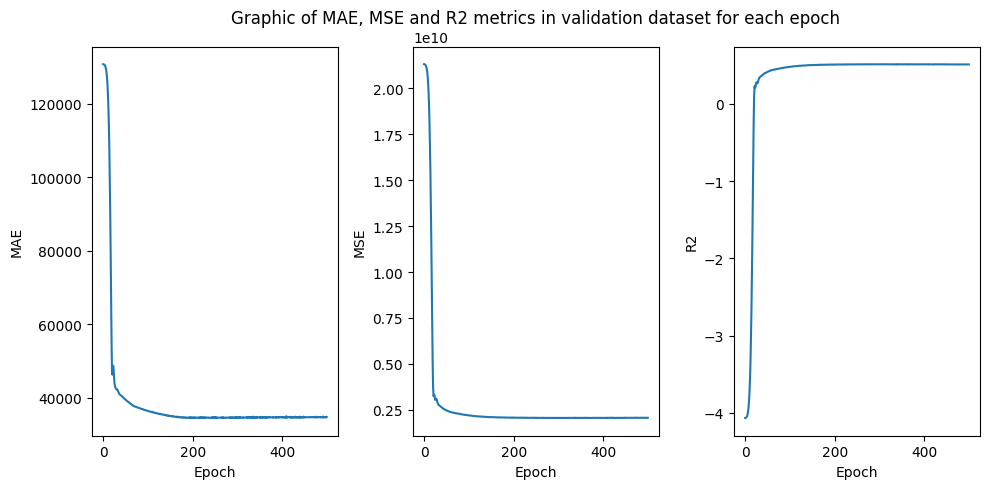

Evaluating model in test dataset...
Metrics results:
MAE = 34760.23046875 - MSE = 1948544128.0 - R2 = 0.5118443656905514


In [201]:
model = pytorch_train_eval_pipeline(500,ModelV2,loss_fn,512,df_cp5,features5,label,
                                    transform_data_functions = [transform_categoric_values_to_token_values],
                                    hyperparameters = [225,dim_embed_vocab,first_dim_mlp,512,64,32,1],
                                    transform_functions = [transform_int,transform] )


O ajuste de hiper parametros permitiu obter um R2 de 51%, obtendo 1% a mais que o melhor modelo anterior. Não é necessário aplicar mais ajustes, pois os modelos estão variando similarmente nos mesmos valores das métricas com diferentes hiper-parametros, indicando que a sua alteração não contribuirá com os resultados.

### Resultados e discussões
#### Resultados dos modelos
A tabela abaixo apresenta os resultados obtidos no dataset de teste para os seguintes modelos:
* **ModelV1**: MLP + LeakyReLU entre cada camada da MLP. A transformação dos dados ocorreu utilizando one-hot encoding;
* **ModelV2**: ModelV1 com acréscimo da rede neural Embedding. A transformação dos dados ocorreu a partir da transformação de cada valor categórico do dataset para um valor numérico distinto, represetando os tokens que serão passado na rede de Embedding;
* **SVM e LinearRegression**: Modelos do *sklearn* treinados a partir de grid search e validação cruzada de 10 folds;


As abreviações em alguns modelos sucedidas do símbolo + indicam:
* **attr**: Atributo derivado do atributo título trabalho. Mais detalhes podem ser vistos no resumo da análise exploratória ou nas células de derivações deste atributo;
* **AH**: Melhor modelo obtido com variação de diferentes hiper-parâmetros;
* **w/o *outliers***: Remoção de *outliers* do dataset.


| Modelos | MAE | MAE | R2 |
|-------|----------|----------|--------|
| ModelV1     | 36642.5 | 2480423424.0 | 43.1% |
| LinearRegression + AH  | 21006925787716.92 | 1.280447126562432e+28 | -2.927357303337593e+18 |
| SVM + AH | 37643.80 | 2595270634.87 | 40.6% |
| SVM + AH + attr | 37420.23 |2578409485.63 | 41% |
| SVM + AH + attr + w/o *outliers* | 36413.43 | 2171524738.08 | 50.3% |
| ModelV2     | 36136.06 | 2455562752.0 | 43.7% |
| ModelV2 + attr     | 35999.19| 2452083200.0 | 43.7%|
| ModelV2 + attr + w/o *outliers* |  34714.98 | 1963823232.0 | 50.8% |
| ModelV2 + attr + AH + w/o *outliers* | **34760.23** | **1948544128.0** | **51,1%** |

O melhor modelo obtido foi o último modelo da tabela. Durante o treinamento e análise exploratória foi percebido a possibilidade de se derivar um atributo e a presença de ouliers do dataset, permitindo melhorias relevantes nos modelos, apesar de ainda não serem bons resultados. Vale ressaltar que o modelo Linear Regression possivelmente retornou estes valores devido ao dataset não possuir um comportameneto linear, visto também no melhor resultado utilizando o SVM, o qual foi obtido a partir do kernel RBF e não linear. 

Mesmo redes poderosas como redes de Embedding e MLP não conseguiram avançar os resultados em diferentes métricas. Como o SVM também conseguiu um resultado similar, possivelmente estes dados não são suficientes para treinar um modelo para prever o atributo salario_em_dolar. Vale ressaltar que foi feito também o treinamento das redes neurais com validação cruzada, no entanto, os resultados em cada validação foi bem similar, reforçando a necessidade de melhores ou novos dados no dataset.  

Por fim, percebe-se através do MAE dos modelos que eles possuem um erro absoluto médio entre 34k e 38k. Este é um erro relevante pois a maioria das pessoas ganham um salário entre 0 e 200.000, ou seja, estes modelos não devem ser utilizados em produção para este problema.
#### Resultados da análise da importância dos atributos
Durante o treinamento foi analisado o comportamento do modelo versão 1 conforme os atributos do dataset foram acrescentados iterativamente, para que fosse possível identificar atributos relevantes. O acréscimo de cada atributo permitiu uma melhoria nos resultados, alguns mais do que outros. A partir da análise realizada, os atributos titulo_trabalho, moeda_salario e nivel_experiencia são considerados os atributos mais importantes para prever o salario_em_dolar, uma vez que geraram melhorias significativas nos resultados com o seu acréscimo. Para validar esta hipótese, o código abaixo apresenta o resultado obtido pelo melhor modelo ao considerar apenas estas 3 features.

117
Metrics results:
MAE = 138637.40625 - MSE = 23565887488.0 - R2 = -4.42295994007233
Training metrics: epoch 1 - loss 130822.3515625
Metrics results:
MAE = 138633.078125 - MSE = 23564638208.0 - R2 = -4.42267192354151
Training metrics: epoch 2 - loss 132487.796875
Metrics results:
MAE = 138623.359375 - MSE = 23561840640.0 - R2 = -4.4220276919634784
Training metrics: epoch 3 - loss 127899.078125
Metrics results:
MAE = 138604.03125 - MSE = 23556270080.0 - R2 = -4.420745686543345
Training metrics: epoch 4 - loss 131378.625
Metrics results:
MAE = 138568.984375 - MSE = 23546173440.0 - R2 = -4.418422691436501
Training metrics: epoch 5 - loss 132021.765625
Metrics results:
MAE = 138509.65625 - MSE = 23529101312.0 - R2 = -4.414493509538708
Training metrics: epoch 6 - loss 134360.375
Metrics results:
MAE = 138414.359375 - MSE = 23501688832.0 - R2 = -4.40818578542378
Training metrics: epoch 7 - loss 132104.640625
Metrics results:
MAE = 138267.453125 - MSE = 23459489792.0 - R2 = -4.3984747853410

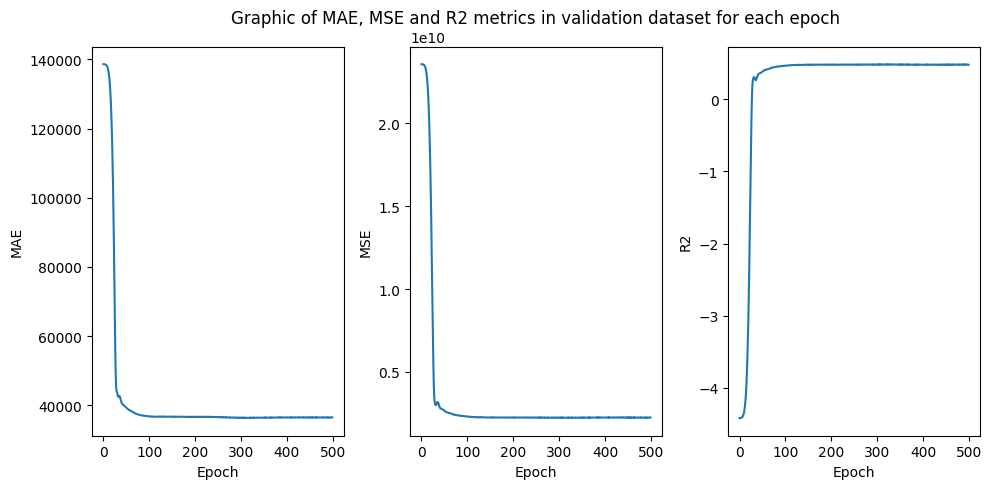

Evaluating model in test dataset...
Metrics results:
MAE = 37460.05078125 - MSE = 2688306688.0 - R2 = 0.38371926897171005


In [203]:
dim_embed_vocab = 256
first_dim_mlp = dim_embed_vocab*3
df_cp6 = df[['titulo_trabalho','salario_em_dolar','moeda_salario','nivel_experiencia']]
features6 = ['titulo_trabalho','moeda_salario','nivel_experiencia']
model = pytorch_train_eval_pipeline(500,ModelV2,loss_fn,512,df_cp6,features6,label,
                                    transform_data_functions = [transform_categoric_values_to_token_values],
                                    hyperparameters = [117,dim_embed_vocab,first_dim_mlp,512,64,32,1],
                                    transform_functions = [transform_int,transform] )

Como esperado, apenas estes atributos são capazes de gerar um R2 de 38%, ou seja, os outros 7 atributos geram uma melhoria de apenas 13% nesta métrica. 